In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
#Changing defaults fonts for plot

font = {'family' : 'sans-serif',
        'size'   : 18}
plt.rc('font', **font)

In [3]:
#Reading necessary data files
df= pd.read_csv("all3_ML_AvgPrecp.csv")

sono= pd.read_csv("Sonoma_ML_AvgPrecp.csv")
coast= pd.read_csv("Coast_ML_AvgPrecp.csv")
valley= pd.read_csv("Valley_ML_AvgPrecp.csv")

In [18]:
df.head(20)

,Unnamed: 0,Rating,PRCP 1,TAVG 1,PRCP 2,TAVG 2,PRCP 3,TAVG 3,PRCP 4,TAVG 4,...,PRCP 8,TAVG 8,PRCP 9,TAVG 9,PRCP 10,TAVG 10,PRCP 11,TAVG 11,PRCP 12,TAVG 12
0,1996,89.000000,8.960,49.1,8.260,53.6,2.610,55.3,3.49,58.6,...,0.00,NaN,0.170,67.0,2.17,62.6,3.480,55.0,13.110,50.4
1,1997,87.900000,10.350,48.8,0.650,52.7,1.020,56.2,0.78,59.9,...,1.02,70.7,0.210,NaN,1.26,NaN,7.480,NaN,3.550,47.7
2,1998,87.666667,12.000,50.1,18.900,50.2,2.310,NaN,2.35,55.5,...,0.00,NaN,0.050,NaN,0.85,61.3,5.670,52.7,1.440,44.7
3,1999,87.258065,4.210,46.4,11.330,49.1,4.130,50.2,2.62,57.1,...,0.00,NaN,0.120,NaN,0.94,NaN,3.190,55.2,0.880,48.7
4,2000,87.888889,5.710,50.0,10.810,52.0,2.740,54.5,2.58,NaN,...,0.02,NaN,0.140,NaN,2.65,61.3,1.220,NaN,1.590,47.7
5,2001,87.972222,3.370,45.8,4.740,49.3,1.730,56.0,0.89,54.5,...,0.00,NaN,0.350,67.6,0.75,NaN,8.580,54.8,11.000,49.3
6,2002,86.671429,3.980,46.7,2.530,52.0,2.670,52.6,0.48,NaN,...,0.00,69.9,0.000,NaN,0.00,61.9,3.950,56.1,9.970,49.1
7,2003,87.055556,3.000,NaN,2.290,50.8,2.380,54.9,4.67,52.2,...,0.00,NaN,0.000,70.3,0.00,NaN,2.880,50.5,7.950,NaN
8,2004,86.980000,3.000,NaN,6.310,50.6,1.060,60.1,0.44,58.6,...,0.00,71.1,0.110,70.5,5.20,60.6,2.310,53.0,10.430,NaN
9,2005,87.432836,4.190,46.3,4.360,52.6,4.780,NaN,1.73,55.1,...,0.00,NaN,0.000,64.2,0.51,NaN,1.840,55.5,14.440,50.0


In [4]:
y =  df["Rating"]

In [5]:
X = df.iloc[:,2:] #Features start on column 2

In [6]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0) #Filling in NaNs with the mean of the column
imp.fit(X)
fillX = imp.transform(X)
scaler = StandardScaler()
scaleX = scaler.fit_transform(fillX)  #Scaling features to have mean 0 and unit variance

In [7]:
trainX = scaleX[:50]

In [8]:
testX = scaleX[50:]

In [9]:
trainy = y[:50]

In [26]:
#fit = SVR(kernel='linear', C=1)
fit = Ridge(alpha=0.01,normalize=True)
#fit = Lasso(alpha=0.00001)

In [27]:
y_fit = fit.fit(trainX, trainy)
score = fit.score(trainX,trainy)

In [28]:
train_predict = y_fit.predict(trainX) #Model predictions on training data

In [29]:
score #R^2 value

0.45003731610805076

In [30]:
test_predict = y_fit.predict(testX) #Model predictions on data not trained on

In [31]:
years = list(range(1996,2016)) #Range of years to plot on x axis

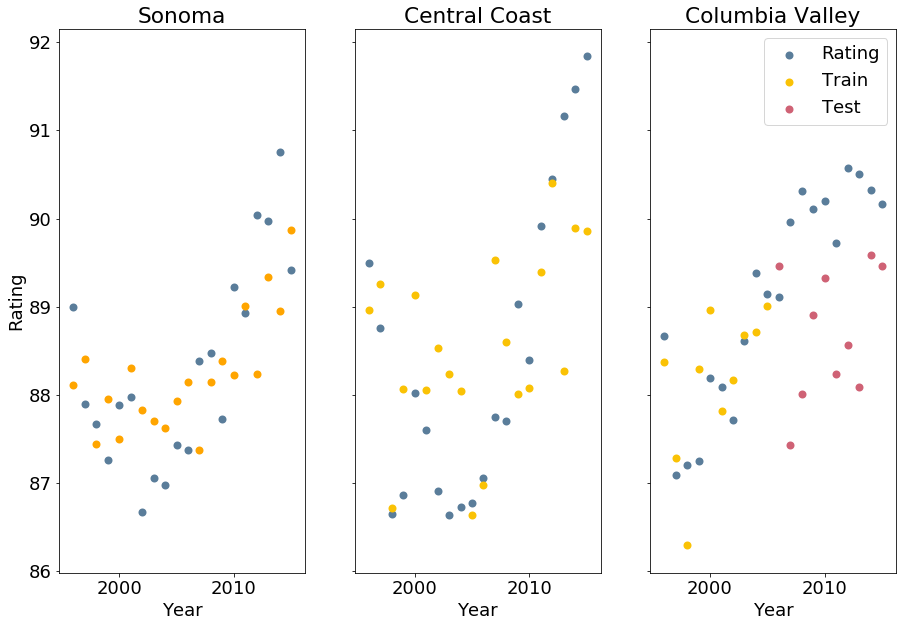

In [32]:
plt.close("all")

fig, ax = plt.subplots(1,3, sharey=True, sharex=True, figsize = (15,10))

ax[0].scatter(years, df.iloc[:20,1], color="xkcd:steel blue", lw=2, label="Rating")
ax[0].scatter(years,train_predict[:20], color="orange", lw=2, label="Train")

ax[0].set_xlabel("Year")
ax[0].set_ylabel("Rating")
ax[0].set_title("Sonoma")


ax[1].scatter(years, df.iloc[20:40,1], color="xkcd:steel blue", lw=2, label="Central Coast")
ax[1].scatter(years, train_predict[20:40], color="xkcd:goldenrod", lw=2, label="Train")

ax[1].set_xlabel("Year")
ax[1].set_title("Central Coast")

ax[2].scatter(years, df.iloc[40:,1], color="xkcd:steel blue", lw=2, label="Rating")
ax[2].scatter(years[:10], train_predict[40:], color="xkcd:goldenrod", lw=2, label="Train")
ax[2].scatter(years[10:], test_predict, color="xkcd:rose", lw=2, label="Test")

ax[2].set_xlabel("Year")
ax[2].set_title("Columbia Valley")
ax[2].legend(loc="best")

plt.savefig("ML_Data.png")
plt.show()

In [33]:
y_fit.coef_

array([-0.28096753,  0.69230805, -0.13764963, -0.21986168, -0.25452024,
       -0.66939097,  0.05097758,  0.55890583, -0.27568562, -0.07002473,
        0.44893728,  0.25087391, -0.31589284, -0.27130133, -0.01411595,
        0.41151831, -0.11459497, -0.63653353, -0.07687275,  0.98934332,
        0.13551049, -0.29182274,  0.20807206, -0.59537277])